In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
# Process that we are going to handle
# Data cleaning
# EDA
# Text processing 
# Model building
# Evaluation
# Improvement
# website
# Deploy


#  Data cleaning

In [6]:
# let's see about the data type null values about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# let'see remove unnamed2,unnamed3,unnamed4 from data as they have more than 98 per null valuda
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [11]:
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Let'see do we have any null values again
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
# let's encode the Target variable
import sklearn
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Target']=label.fit_transform(data['Target'])

In [14]:
data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
# check duplicate
data.duplicated().sum()

403

In [16]:
# drop duplicate
data=data.drop_duplicates(keep='first')

In [17]:
# check duplicate
data.duplicated().sum()

0

# EDA

In [18]:
import matplotlib.pyplot as plt
data['Target'].value_counts()
# 0-ham
# 1-spam

0    4516
1     653
Name: Target, dtype: int64

<AxesSubplot:ylabel='Target'>

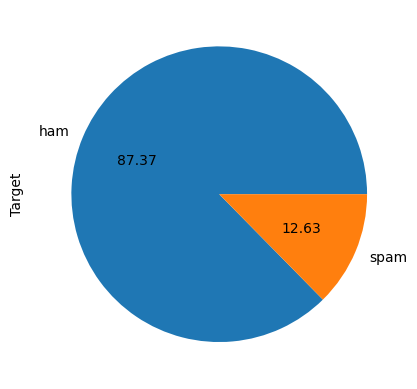

In [19]:
data['Target'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct='%0.2f')

In [20]:
# Data is unbalanced

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
data['num_character']=data['Text'].apply(len)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9596\3855170302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_character']=data['Text'].apply(len)


In [25]:
data.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
data['num_words']=data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_9596\2212202744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
data.head()

,Target,Text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
data['num_sentence']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_9596\4183354117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentence']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [29]:
data['Text'][0]
data.head()

,Target,Text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
data[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# let's analyze these ham and spam seperately

In [32]:
# Ham
data[data['Target']==0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# spam
data[data['Target']==1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

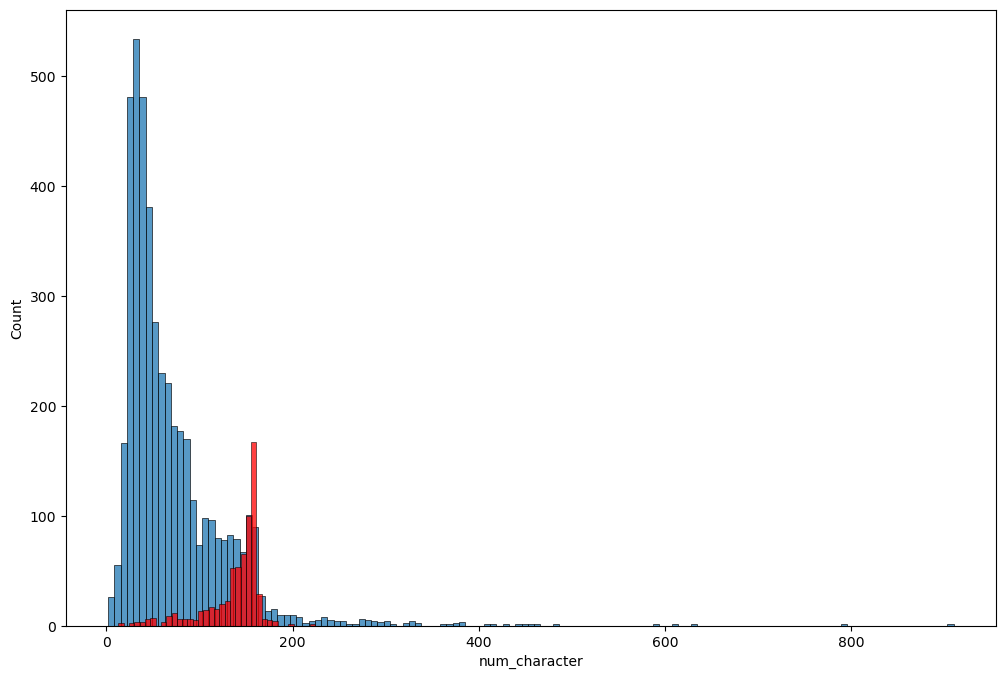

In [34]:
# Viszulae
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(data[data['Target']==0]['num_character'])
sns.histplot(data[data['Target']==1]['num_character'],color='Red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

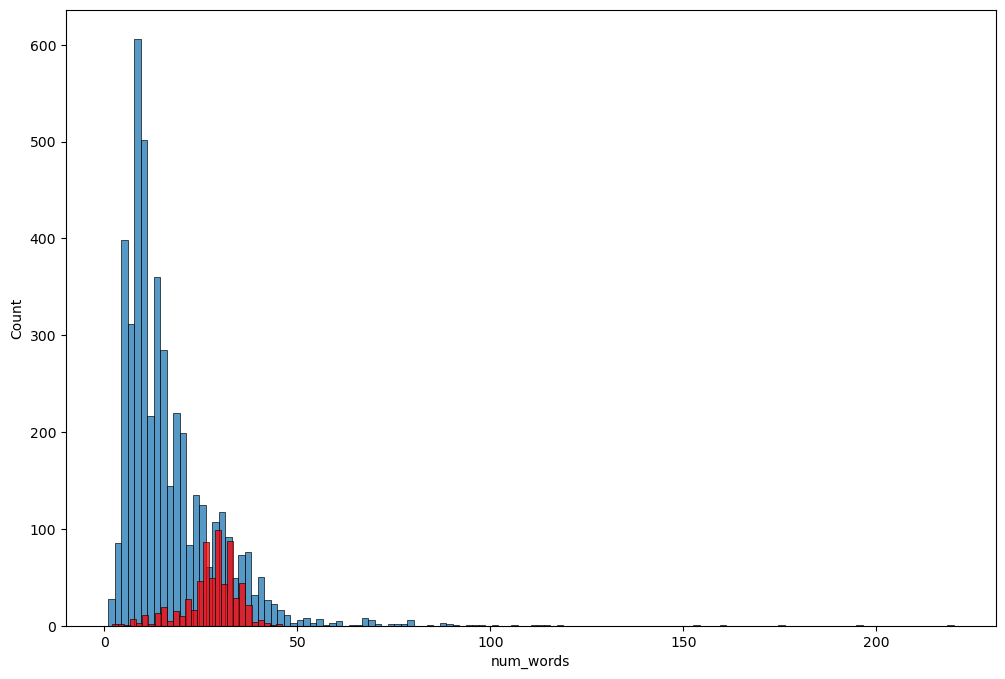

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Target']==0]['num_words'])
sns.histplot(data[data['Target']==1]['num_words'],color='Red')

<AxesSubplot:xlabel='num_sentence', ylabel='Count'>

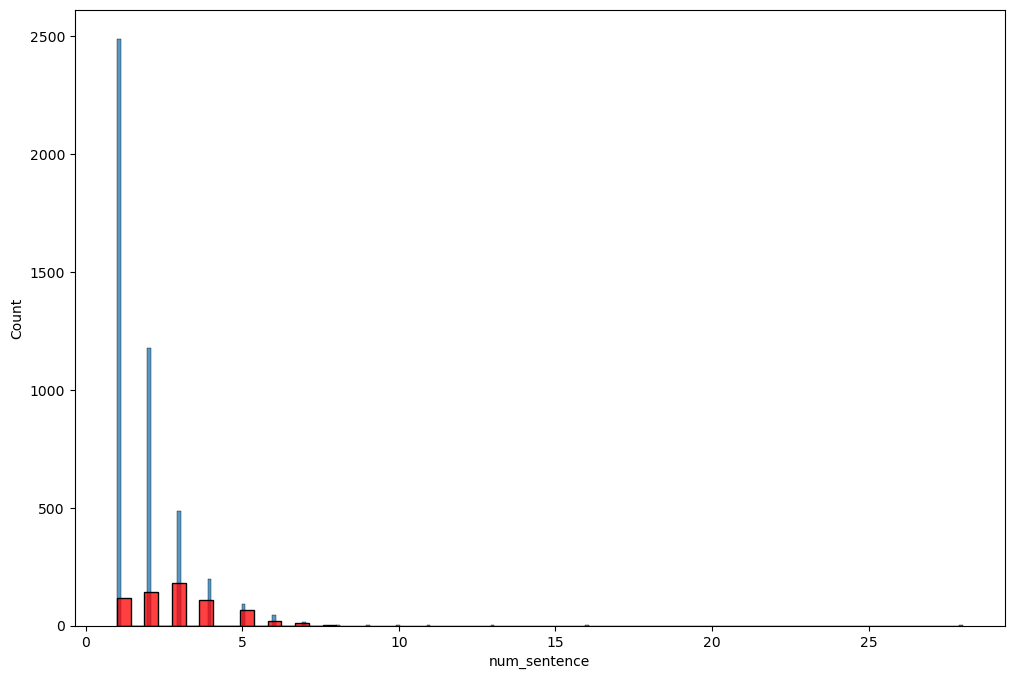

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Target']==0]['num_sentence'])
sns.histplot(data[data['Target']==1]['num_sentence'],color='Red')

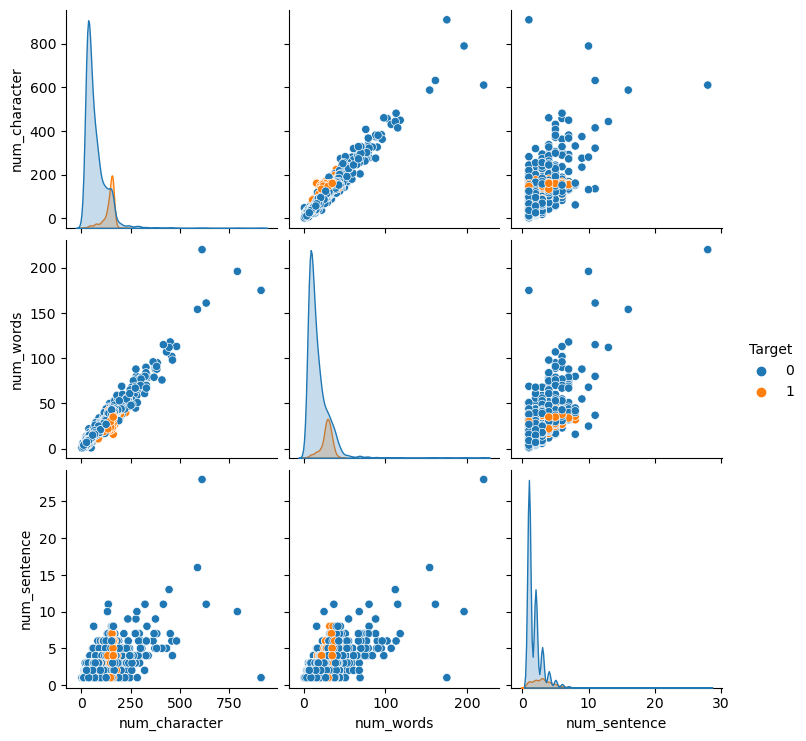

In [37]:
sns.pairplot(data,hue='Target')

In [38]:
 # LET'S FIND OUT THE CORRELEATION
data.corr()

,Target,num_character,num_words,num_sentence
Target,1.000000,0.384717,0.262984,0.284901
num_character,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentence,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

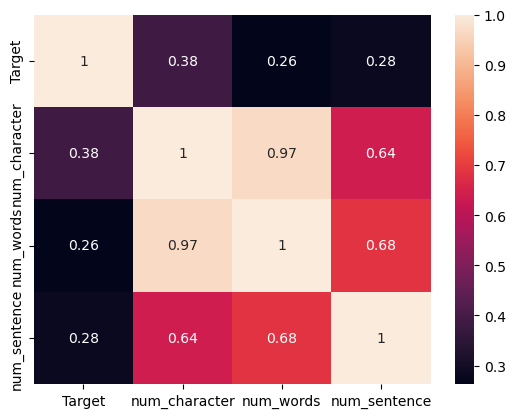

In [39]:
sns.heatmap(data.corr(),annot=True)

In [40]:
# from the heatmap we can see that there is highly multicorrelatvely between indepent varibale
# so we can use only few of thems
# like num_character and num_words are highly corelatted with each other


# Data Preprocessing

In [41]:
#Lower case
# Tokenization
# Removing special character and stop words
#stopwords
#streaming 

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords

In [44]:
import string

In [45]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [46]:
def transform_txt(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
        

In [47]:
data['transformed_text']=data['Text'].apply(transform_txt)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9596\1060464135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text']=data['Text'].apply(transform_txt)


In [48]:
 data.head()

,Target,Text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
 # let'see see the Wordcloud
!pip install wordcloud


In [50]:
from wordcloud import WordCloud
spam_word=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
img=spam_word.generate(data[data['Target']==1]['transformed_text'].str.cat(sep=''))

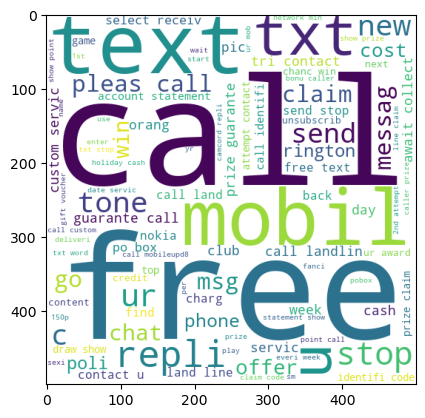

In [51]:
plt.imshow(img)

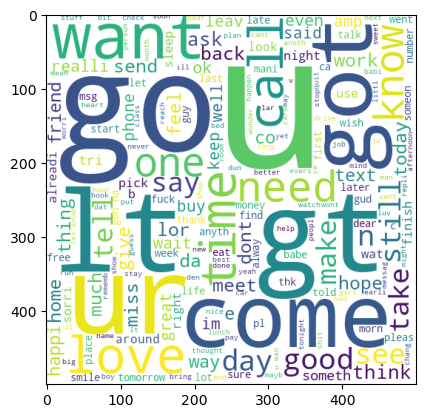

In [52]:
# ham
ham_word=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
img=ham_word.generate(data[data['Target']==0]['transformed_text'].str.cat(sep=''))
plt.imshow(img)

In [53]:
# let's find out the count of each word in the data
spam_corpus=[]
for i in data[data['Target']==1]['transformed_text'].tolist():
    for word in i.split(' '):
        spam_corpus.append(word)
        
        

In [54]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


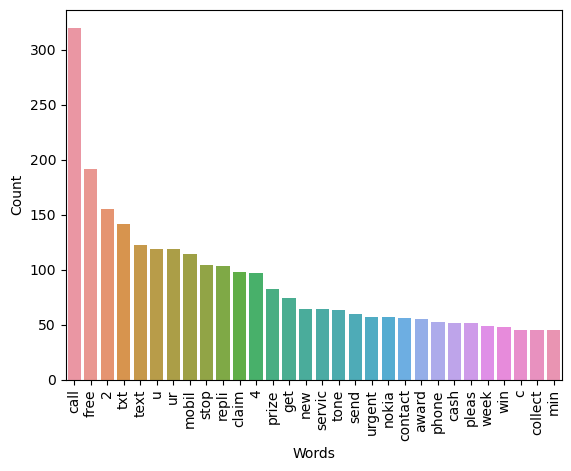

In [55]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [56]:
ham_corpus=[]
for i in data[data['Target']==0]['transformed_text'].tolist():
    for word in i.split(" "):
        ham_corpus.append(word)
        

In [57]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


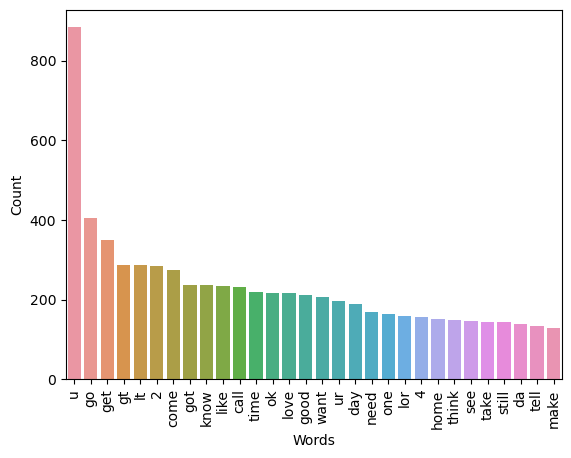

In [58]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

# Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
sc=CountVectorizer()
x=sc.fit_transform(data['transformed_text']).toarray()

In [60]:
x.shape


(5169, 6708)

In [61]:
y=data['Target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [64]:
# Navies Baye
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
Bn=BernoulliNB()
Gn=GaussianNB()
Mn=MultinomialNB()

In [65]:
Gn.fit(X_train,y_train)
y_predict=Gn.predict(X_test)

In [66]:
y_predict

array([0, 1, 1, ..., 0, 0, 0])

In [67]:
# let's check the accuaracy score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
print('Accuaracy socre:',accuracy_score(y_test,y_predict))
print('Confusion_metrics',confusion_matrix(y_test,y_predict))
print('precision_metrics',precision_score(y_test,y_predict))

Accuaracy socre: 0.8800773694390716
Confusion_metrics [[792 104]
 [ 20 118]]
precision_metrics 0.5315315315315315


In [69]:
Mn.fit(X_train,y_train)
y_predict2=Mn.predict(X_test)
print('Accuaracy socre:',accuracy_score(y_test,y_predict2))
print('Confusion_metrics',confusion_matrix(y_test,y_predict2))
print('precision_metrics',precision_score(y_test,y_predict2))

Accuaracy socre: 0.9642166344294004
Confusion_metrics [[871  25]
 [ 12 126]]
precision_metrics 0.8344370860927153


In [70]:
Bn.fit(X_train,y_train)
y_predict3=Bn.predict(X_test)
print('Accuaracy socre:',accuracy_score(y_test,y_predict3))
print('Confusion_metrics',confusion_matrix(y_test,y_predict3))
print('precision_metrics',precision_score(y_test,y_predict3))

Accuaracy socre: 0.9700193423597679
Confusion_metrics [[893   3]
 [ 28 110]]
precision_metrics 0.9734513274336283


# Using Tfidvectoeizer

In [71]:
data['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [72]:
# Converting text to Vector using tfidvectoeizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=3000)
x1=tf.fit_transform(data['transformed_text']).toarray()

In [73]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
X1_train, X1_test, y1_train, y1_test=train_test_split(x1,y,test_size=0.20,random_state=2)

In [75]:
X1_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
Gn.fit(X1_train,y1_train)
y_predict1=Gn.predict(X1_test)
print('Accuaracy socre:',accuracy_score(y1_test,y_predict1))
print('Confusion_metrics',confusion_matrix(y1_test,y_predict1))
print('precision_metrics',precision_score(y1_test,y_predict1))

Accuaracy socre: 0.8694390715667312
Confusion_metrics [[788 108]
 [ 27 111]]
precision_metrics 0.5068493150684932


In [77]:
Mn.fit(X1_train,y1_train)
y_predict2=Mn.predict(X1_test)
print('Accuaracy socre:',accuracy_score(y_test,y_predict2))
print('Confusion_metrics',confusion_matrix(y_test,y_predict2))
print('precision_metrics',precision_score(y_test,y_predict2))

Accuaracy socre: 0.9709864603481625
Confusion_metrics [[896   0]
 [ 30 108]]
precision_metrics 1.0


In [78]:
Bn.fit(X1_train,y1_train)
y_predict3=Bn.predict(X1_test)
print('Accuaracy socre:',accuracy_score(y1_test,y_predict3))
print('Confusion_metrics',confusion_matrix(y1_test,y_predict3))
print('precision_metrics',precision_score(y1_test,y_predict3))

Accuaracy socre: 0.9835589941972921
Confusion_metrics [[895   1]
 [ 16 122]]
precision_metrics 0.991869918699187


In [79]:
# from above we can see that Tfidvectoeizer with bernBernoulliNB is working good comapre to others


In [80]:
!pip install xgboost

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
    
}

In [84]:
def train_classifier(clf,X1_train,y1_train,X1_test,y1_test):
    clf.fit(X1_train,y1_train)
    y_pred = clf.predict(X1_test)
    accuracy = accuracy_score(y1_test,y_pred)
    precision = precision_score(y1_test,y_pred)
    
    return accuracy,precision 

In [85]:
train_classifier(svc,X1_train,y1_train,X1_test,y1_test)

(0.9758220502901354, 0.9747899159663865)

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X1_train,y1_train,X1_test,y1_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False) 

In [88]:
#performance_df_3000 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000':accuracy_scores,'Precision_3000':precision_scores}).sort_values('Precision_3000',ascending=False) 

In [89]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [90]:
        
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")                              

In [91]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


In [92]:
df=performance_df1

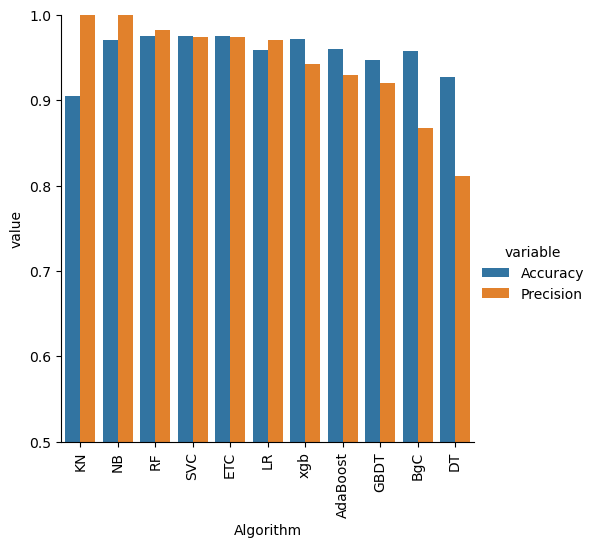

In [93]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [94]:
#new_df

In [95]:
# let's change the parameter of the Tfidvectoeizer max_features=3000

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [98]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [99]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188


In [100]:
# from above we can see that Navie's bayes accuracy has been increased by .2 which is good as compare to prevoius


In [101]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [102]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [103]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [104]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [105]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [106]:
from sklearn.ensemble import StackingClassifier

In [107]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [108]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9545454545454546


In [114]:
import joblib
joblib.dump(tf,'vectorizer.pkl')
joblib.dump(Mn,'model.pkl')

['model.pkl']

In [ ]:
text=input('enter the massage ')
def transform_txt(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
a=transform_txt(text)
b=tf.transform([a]).toarray()


In [ ]:
Bn.predict(b)